# Get Started in Deep Learning
Predictive modeling with deep learning is a skill that modern developers need to know.

TensorFlow is the premier open-source deep learning framework developed and maintained by Google. Although using TensorFlow directly can be challenging, the modern tf.keras API beings the simplicity and ease of use of Keras to the TensorFlow project.

Using tf.keras allows you to design, fit, evaluate, and use deep learning models to make predictions in just a few lines of code. It makes common deep learning tasks, such as classification and regression predictive modeling, accessible to average developers looking to get things done.

In this tutorial, you will discover a step-by-step guide to developing deep learning models in TensorFlow using the tf.keras API.
 Deep Learning Model Life-Cycle

In this section, you will discover the life-cycle for a deep learning model and the two tf.keras APIs that you can use to define models.
##  The 5-Step Model Life-Cycle

A model has a life-cycle, and this very simple knowledge provides the backbone for both modeling a dataset and understanding the tf.keras API.

The five steps in the life-cycle are as follows:

    Define the model.
    Compile the model.
    Fit the model.
    Evaluate the model.
    Make predictions.

In [20]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
import warnings
import optuna 
warnings.filterwarnings('ignore')

# Load the training data

In [4]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [5]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))


In [6]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(cat_columns)
print(num_columns)
print(all_columns)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']


# Prepare Data :

In [23]:
###################
Robustscaler  = make_pipeline( SimpleImputer(strategy='median',add_indicator=True),
                      
                        RobustScaler()
)
OneHotencoder = make_pipeline(
            SimpleImputer(strategy='most_frequent',add_indicator=True),
            OneHotEncoder() )
# Preprocess Pipe : 
##################
OneHot_RobustScaler = make_column_transformer(
    ( OneHotencoder , cat_columns),
    ( Robustscaler, num_columns))

In [24]:
# Create arrays for the features and the response variable
y = train['target']
X = train.drop(['id','target'], axis=1)
OneHot_RobustScaler.fit(X)
Xpre= OneHot_RobustScaler.transform(X)
test_final= test.drop(['id'], axis=1)
test_finalpre=OneHot_RobustScaler.transform(test_final)


(270000, 24) (30000, 24) (270000,) (30000,)


In [28]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(Xpre, y, test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(270000, 70) (30000, 70) (270000,) (30000,)


In [25]:
# set learning rate scheduler
# we can chage learning rate during learning

def lr_schedul(epoch):
    x = 0.01
    if epoch >= 5:
        x = 0.005
    if epoch >= 10:
        x = 0.001
    if epoch >= 15:
        x = 0.0008
    if epoch >= 20:
        x = 0.0005
    if epoch >= 30:
        x = 0.0001
    if epoch >= 60:
        x = 0.00001        
    return x

lr_decay = LearningRateScheduler(
    lr_schedul,
    verbose=1,
)

# Sequential Model API (Simple)

In [32]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# determine the number of input features
n_features = X_train.shape[1]

# define model
# Create model here
model =tf.keras.Sequential()
model.add(layers.Dense(20,  kernel_initializer='he_normal', input_shape=(n_features,), activation = 'relu')) # Rectified Linear Unit Activation Function
model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation = 'linear')) # linear for regression 
# Compile model here
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss = 'mean_squared_error', optimizer = optimizer,
              metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                1420      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [42]:
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001,
                   restore_best_weights=True,patience=10)
#batch_size=1000
# fit model using our gpu
with tf.device('/gpu:0'):
     history = model.fit(Xpre,y,batch_size=256,epochs=EPOCHS, 
                         validation_split = 0.1,
                         verbose=0 ,callbacks=[lr_decay ,es],shuffle=True)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00011: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00012: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00013: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00014: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00015: LearningRateScheduler red

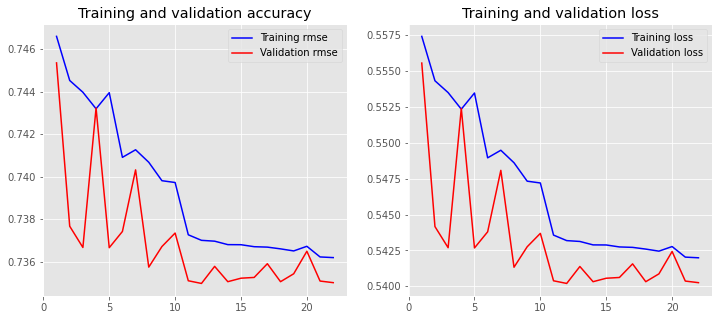

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['rmse']
    val_acc = history.history['val_rmse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training rmse')
    plt.plot(x, val_acc, 'r', label='Validation rmse')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [44]:
# evaluate the keras model

loss, rmse = model.evaluate( X_test, y_test, verbose=2)
print(" rmse".format(rmse))

938/938 - 1s - loss: 0.5355 - rmse: 0.7318
 rmse


938/938 - 1s - loss: 0.5386 - rmse: 0.7339
 rmse


## Regularization : 

In [46]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# determine the number of input features
n_features = X_train.shape[1]

# define model
# Create model here
model_reg =tf.keras.Sequential()
model_reg.add(layers.Dense(50,  input_shape=(n_features,), activation = 'relu')) # Rectified Linear Unit Activation Function
model_reg.add(layers.BatchNormalization())
model_reg.add(layers.Dropout(0.4))
model_reg.add(layers.Dense(30, activation = 'relu'))
model_reg.add(layers.Dropout(0.2))
model_reg.add(layers.Dense(5, activation = 'relu'))
model_reg.add(layers.Dense(1, activation = 'linear')) # linear for regression 
# Compile model here
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model_reg.compile(loss = 'mean_squared_error', optimizer = optimizer,
              metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])
model_reg.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                3550      
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 155       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

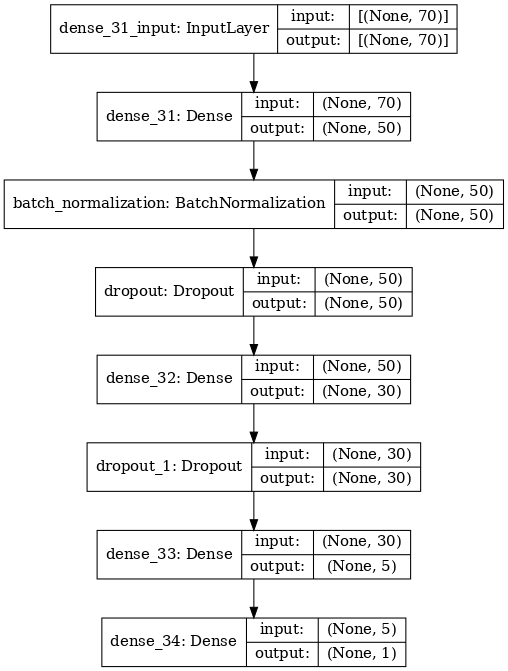

In [47]:
tf.keras.utils.plot_model(model=model_reg, show_shapes=True, dpi=76, )

In [49]:
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001,
                   restore_best_weights=True,patience=10)
#batch_size=1000
# fit model using our gpu
with tf.device('/gpu:0'):
     history2 = model_reg.fit(Xpre,y,batch_size=256,epochs=EPOCHS, 
                         validation_split = 0.1,
                         verbose=0 ,callbacks=[lr_decay ,es],shuffle=True)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00011: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00012: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00013: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00014: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00015: LearningRateScheduler red

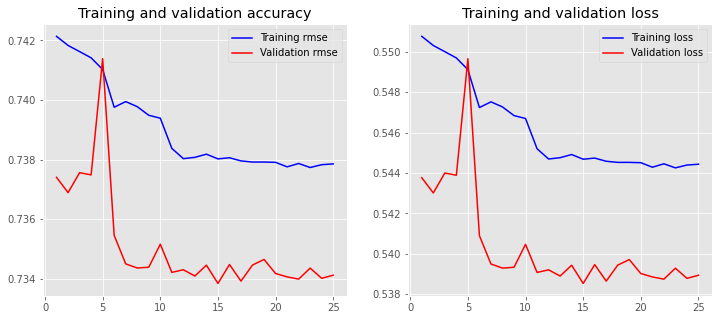

In [50]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['rmse']
    val_acc = history.history['val_rmse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training rmse')
    plt.plot(x, val_acc, 'r', label='Validation rmse')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history2)

In [52]:
# evaluate the keras model

loss2, rmse2 = model_reg.evaluate( X_test, y_test, verbose=2)
print(" rmse".format(rmse2))

938/938 - 1s - loss: 0.5353 - rmse: 0.7317
 rmse


938/938 - 1s - loss: 0.5353 - rmse: 0.7317
 rmse
 small enhancement 

# More deep :Regularization in Deep Learning — L1, L2,BatchNormalization, and Dropout

In [55]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# determine the number of input features
n_features = X_train.shape[1]
# define model
# Create model here
model_reg2 =tf.keras.Sequential()
model_reg2.add(layers.Dense(50,  input_shape=(n_features,),
                            kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                            activation = 'relu')) # Rectified Linear Unit Activation Function
model_reg2.add(layers.BatchNormalization())
model_reg2.add(layers.Dropout(0.45))
model_reg2.add(layers.Dense(40, activation = 'relu'))
model_reg2.add(layers.Dropout(0.3))
model_reg2.add(layers.Dense(30, activation = 'relu'))
model_reg2.add(layers.Dropout(0.2))
model_reg2.add(layers.Dense(5, activation = 'relu'))
model_reg2.add(layers.Dense(1, activation = 'linear')) # linear for regression 
# Compile model here
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model_reg2.compile(loss = 'mean_squared_error', optimizer = optimizer,
              metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])
EPOCHS =1000
# configure early stopping
es = EarlyStopping(monitor='val_loss',min_delta=0.0000000000001,
                   restore_best_weights=True,patience=10)
#batch_size=1000
# fit model using our gpu
with tf.device('/gpu:0'):
     history2 = model_reg2.fit(Xpre,y,batch_size=256,epochs=EPOCHS, 
                         validation_split = 0.1,
                         verbose=0 ,callbacks=[lr_decay ,es],shuffle=True)


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.

Epoch 00006: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00007: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00008: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00009: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00010: LearningRateScheduler reducing learning rate to 0.005.

Epoch 00011: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00012: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00013: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00014: LearningRateScheduler reducing learning rate to 0.001.

Epoch 00015: LearningRateScheduler red

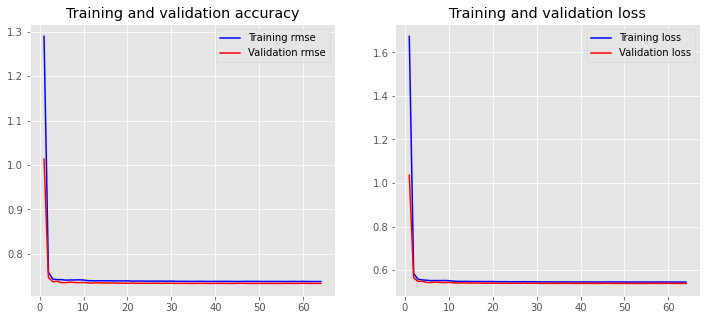

In [56]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['rmse']
    val_acc = history.history['val_rmse']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training rmse')
    plt.plot(x, val_acc, 'r', label='Validation rmse')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 
    
plot_history(history2)

In [57]:
# evaluate the keras model

loss3, rmse3 = model_reg2.evaluate( X_test, y_test, verbose=2)
print(" rmse".format(rmse3))

938/938 - 1s - loss: 0.5358 - rmse: 0.7316
 rmse


In [40]:
predictions = model_reg2.predict(test_finalpre)
predictions = predictions.flatten()
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test.id,
                       'target': predictions})
output.to_csv('simpledeep.csv', index=False)
output

,Id,target
0,0,8.052651
1,5,8.361962
2,15,8.315985
3,16,8.268001
4,17,8.217670
...,...,...
199995,499987,8.237559
199996,499990,8.194793
199997,499991,8.239011
199998,499994,8.284653


# Summuray 

with more deep mlp  we enhance the results 
let's try other encoding tecthniques in order to have better results 

reference : 
to try : 

https://www.kaggle.com/mtinti/keras-starter-with-bagging-1111-84364

https://www.kaggle.com/faressayah/tensorflow-2-tutorial-get-started-in-deep-learning